# Word2Vec Using Tensorflow with Korean News Article Titles


#### Kisoo Kim, 07/25/2018



#### This time I used a list of sample news articles that were shared on Facebook at least once.

The news articles for this notebook are parts of the articles published online from 07/20/2018 to 07/23/2018.

This overall structure of the code below follows an example by Minsuk Heo, available at https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/nlp/word2vec_tensorflow.ipynb

In [17]:
# Load File
lines = []
f = open('cqrs_shared.txt','rt', encoding='utf-8')  # Open file with 'UTF-8' 인코딩
while True:
    line = f.readline()
    lines.append(line)
    if not line:
        break
f.close()

# Use part if original text data is too large
lines = lines[0:10]

# Extract corpus from a sentence
from konlpy.tag import Kkma
from konlpy.utils import pprint

def extract_corpus(sentence):
    kkma = Kkma()
    result = []
    corpus = kkma.pos(sentence)
    for each in corpus:
        pos = each[1][0]
        if(pos == "N"):
        #if(pos == "N" or pos == "V" or pos == "M"):
            result.append(each[0])
    return result

# Remove Characters
titles = []
remove_characters = ['\\n', "\n", '\'', '"', "'", '’', '‘']
for title in lines:
    for remove_character in remove_characters:
        title = title.replace(remove_character,"")
    titles.append(title)


# Array of Corpus List for Each Sentence
corpus = []
    
for title in titles:
    corpus.append(extract_corpus(title))

In [18]:
print(len(corpus))

10


In [19]:
print(corpus)

[['외신', '충격', '보도', '정부', '기밀', '자료', '대통령', '질책', '감기', '꾀병', '매티스', '장관', '회담', '취소'], ['우리', '아버지', '김', '정은', '원수', '부천', '국제', '판', '스틱', '영화제', '김', '정은', '찬양', '영화', '공개', '상영'], ['문재', '인은', '퇴진', '시민', '정부', '정책', '불복종', '문', '대통령', '지지', '교수', '외침'], ['박근', '포괄적', '뇌물죄', '운운', '노회', '찬', '정작', '본인', '뇌물', '수수'], ['내', '남', '불', '정부', '박근', '정부', '특활', '사용', '비난', '현', '정부', '특활', '비', '공개', '거부'], ['역사', '교과서', '속', '자유', '삭제', '정부', '헌법', '무시', '직권', '남용', '이자', '반국가', '행위'], ['김', '문수', '대통령', '기무사', '여론', '재판', '시작', '간첩', '누'], ['민', '구', '전', '장관', '기무사', '문건', '의원', '위수령', '관련', '질의', '법적', '요건', '절차', '자료', '뿐', '총리실', '보고'], ['정부', '수립', '70', '주년', '기념', '예산', '절반', '삭감', '정부'], ['눈치', '국방부', '3', '축', '체계', '표현', '삭제', '김', '정은', '참수', '작전', '예산', '반영']]


In [27]:
words = []
for text in corpus:
    for word in text:
        words.append(word)

words = set(words)

In [28]:
print(len(words))

106


In [29]:
print(words)

{'이자', '포괄적', '구', '우리', '찬양', '운운', '남용', '행위', '위수령', '문재', '기밀', '정부', '기무사', '반국가', '시작', '지지', '보고', '문', '남', '찬', '총리실', '정은', '김', '노회', '3', '거부', '눈치', '공개', '감기', '역사', '뇌물죄', '삭제', '불', '회담', '질의', '비', '주년', '체계', '충격', '헌법', '판', '취소', '직권', '특활', '영화', '기념', '인은', '질책', '뿐', '매티스', '본인', '국제', '뇌물', '국방부', '관련', '정작', '외침', '속', '무시', '참수', '누', '요건', '현', '불복종', '반영', '교수', '법적', '부천', '대통령', '재판', '수립', '의원', '아버지', '보도', '70', '박근', '예산', '시민', '사용', '여론', '간첩', '장관', '민', '표현', '전', '교과서', '내', '자료', '원수', '스틱', '외신', '자유', '축', '상영', '문수', '절반', '영화제', '정책', '꾀병', '수수', '문건', '작전', '삭감', '퇴진', '비난', '절차'}


In [30]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence)
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [31]:
import pandas as pd
df = pd.DataFrame(data, columns = ['input', 'label'])

In [32]:
df.head(10)

,input,label
0,외신,충격
1,외신,보도
2,충격,외신
3,충격,보도
4,충격,정부
5,보도,외신
6,보도,충격
7,보도,정부
8,보도,기밀
9,정부,충격


In [33]:
df.shape

(450, 2)

In [34]:
word2int

{'3': 24,
 '70': 74,
 '간첩': 80,
 '감기': 28,
 '거부': 25,
 '공개': 27,
 '관련': 54,
 '교과서': 85,
 '교수': 65,
 '구': 2,
 '국방부': 53,
 '국제': 51,
 '기념': 45,
 '기무사': 12,
 '기밀': 10,
 '김': 22,
 '꾀병': 98,
 '남': 18,
 '남용': 6,
 '내': 86,
 '노회': 23,
 '뇌물': 52,
 '뇌물죄': 30,
 '누': 60,
 '눈치': 26,
 '대통령': 68,
 '매티스': 49,
 '무시': 58,
 '문': 17,
 '문건': 100,
 '문수': 94,
 '문재': 9,
 '민': 82,
 '박근': 75,
 '반국가': 13,
 '반영': 64,
 '법적': 66,
 '보고': 16,
 '보도': 73,
 '본인': 50,
 '부천': 67,
 '불': 32,
 '불복종': 63,
 '비': 35,
 '비난': 104,
 '뿐': 48,
 '사용': 78,
 '삭감': 102,
 '삭제': 31,
 '상영': 93,
 '속': 57,
 '수립': 70,
 '수수': 99,
 '스틱': 89,
 '시민': 77,
 '시작': 14,
 '아버지': 72,
 '여론': 79,
 '역사': 29,
 '영화': 44,
 '영화제': 96,
 '예산': 76,
 '외신': 90,
 '외침': 56,
 '요건': 61,
 '우리': 3,
 '운운': 5,
 '원수': 88,
 '위수령': 8,
 '의원': 71,
 '이자': 0,
 '인은': 46,
 '자료': 87,
 '자유': 91,
 '작전': 101,
 '장관': 81,
 '재판': 69,
 '전': 84,
 '절반': 95,
 '절차': 105,
 '정부': 11,
 '정은': 21,
 '정작': 55,
 '정책': 97,
 '주년': 36,
 '지지': 15,
 '직권': 42,
 '질의': 34,
 '질책': 47,
 '찬': 19,
 '찬양': 4,
 '참수'

In [46]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [48]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 10001
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 200 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  5.403995
iteration 200 loss is :  4.51625
iteration 400 loss is :  4.27433
iteration 600 loss is :  4.0886836
iteration 800 loss is :  3.9341574
iteration 1000 loss is :  3.8140023
iteration 1200 loss is :  3.7191143
iteration 1400 loss is :  3.6381664
iteration 1600 loss is :  3.5662663
iteration 1800 loss is :  3.5016944
iteration 2000 loss is :  3.4460487
iteration 2200 loss is :  3.3997543
iteration 2400 loss is :  3.3607771
iteration 2600 loss is :  3.327342
iteration 2800 loss is :  3.2979534
iteration 3000 loss is :  3.2714179
iteration 3200 loss is :  3.2469714
iteration 3400 loss is :  3.2242794
iteration 3600 loss is :  3.203316
iteration 3800 loss is :  3.1841877
iteration 4000 loss is :  3.166969
iteration 4200 loss is :  3.151606
iteration 4400 loss is :  3.1379194
iteration 4600 loss is :  3.1256595
iteration 4800 loss is :  3.114572
iteration 5000 loss is :  3.1044383
iteration 5200 loss is :  3.0950902
iteration 5400 loss is :  3.086402
iteration 

In [50]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)

In [51]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,이자,-5.325912,-3.184629
1,포괄적,3.853898,5.225281
2,구,-4.350060,3.697332
3,우리,2.783707,-3.497116
4,찬양,5.214339,-3.027120
5,운운,3.041536,5.553162
6,남용,-5.221618,-3.509279
7,행위,-5.022042,-3.049718
8,위수령,-1.250312,-0.447525
9,문재,2.694258,2.144835


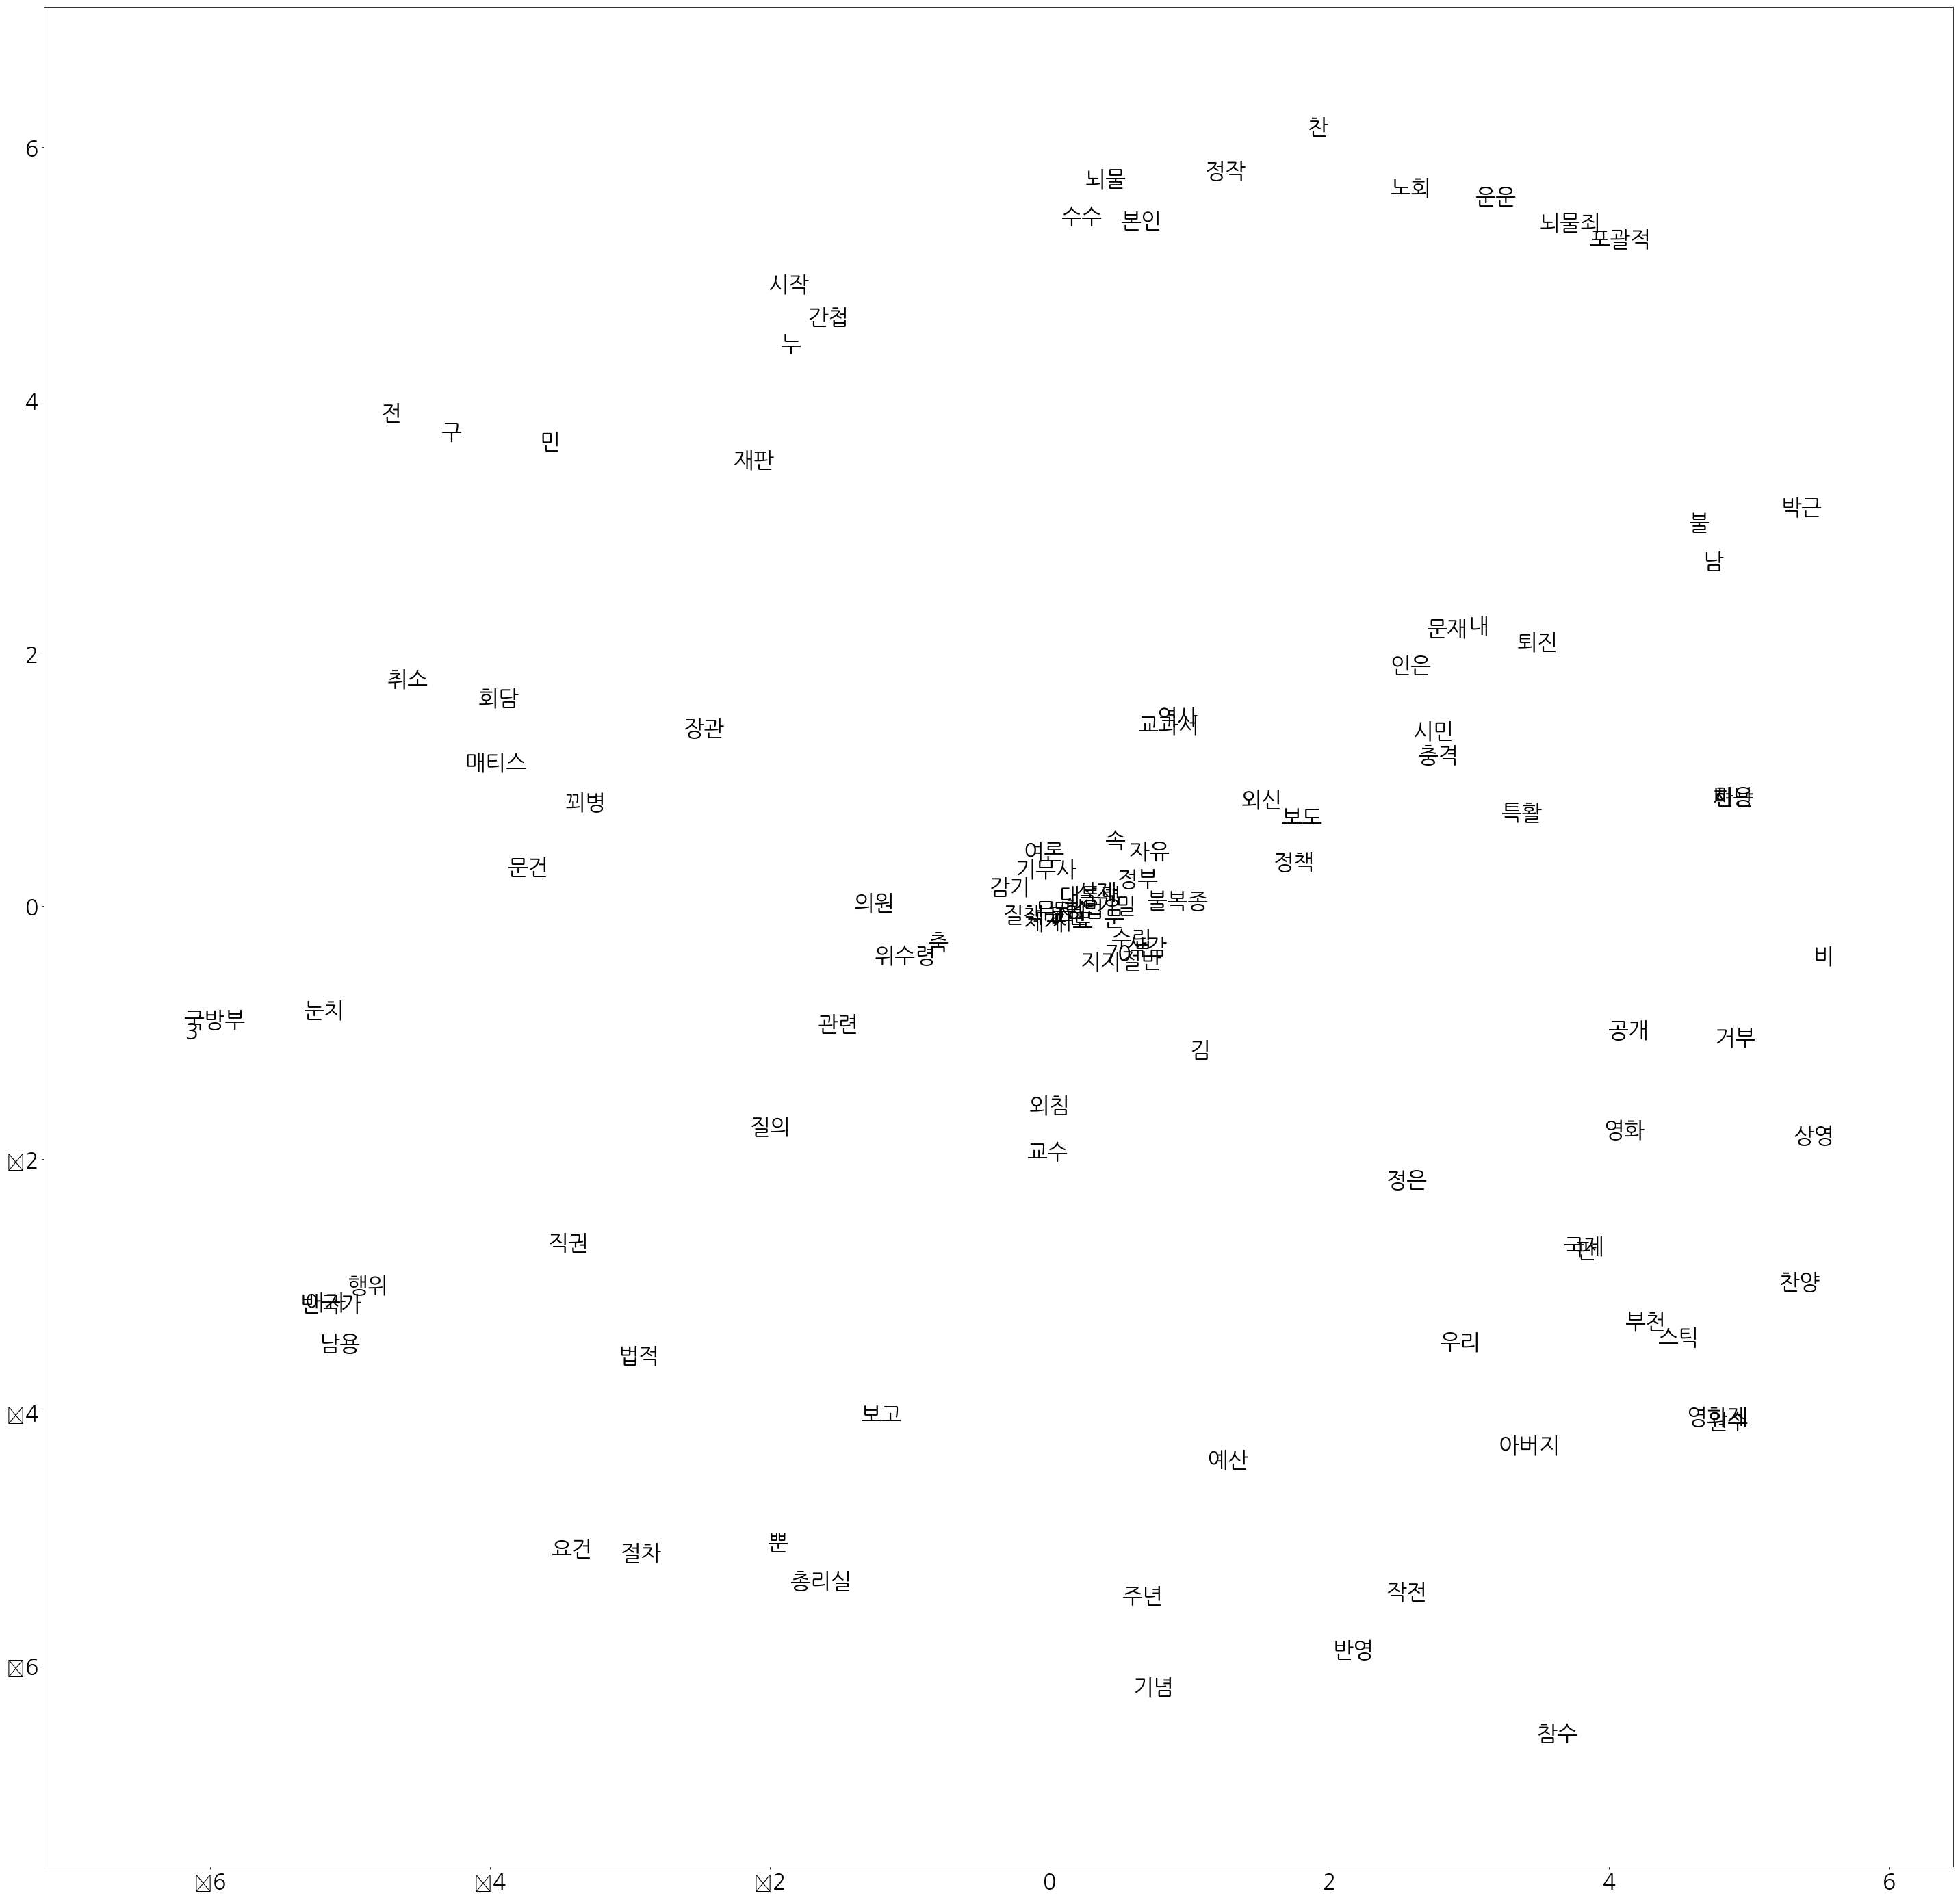

In [53]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_location = 'nanumgothic.ttf'  
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name, size=32)

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (50,50)

plt.show()